MONTE CARLO SIMULATION FOR A PORTFOLIO OF STOCKS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr



In [2]:
#import data
#the function to get mean returns and var cov matrix
def get_data(stocks,start,end):
    stocksdata = pdr.get_data_yahoo(stocks,start,end)
    stocksdata=stocksdata['Close']
    returns = np.log(stocksdata/stocksdata.shift(1))
    meanreturns=returns.mean()
    varcov= returns.cov()
    return meanreturns,varcov
#calling the stocks and start and and enddate
stocks =['AMZN','TSLA','GOOGL','ADBE']
end= dt.datetime(2021,10,28)
start = end-dt.timedelta(days =100)
#calling the functions with the parameters
meanreturns,varcov = get_data(stocks,start,end)
print(meanreturns)

data = pdr.get_data_yahoo(stocks,start,end)
price = np.array(data.Close)
print(price)


Symbols
AMZN    -0.000508
TSLA     0.006887
GOOGL    0.002037
ADBE     0.000690
dtype: float64
[[3573.18994141  660.5        2524.18994141  608.7199707 ]
 [3585.19995117  655.28997803 2550.97998047  612.26000977]
 [3638.0300293   649.26000977 2568.42993164  623.67999268]
 [3656.63989258  643.38000488 2660.30004883  625.86999512]
 [3699.82006836  657.61999512 2680.69995117  620.79998779]
 [3626.38989258  644.7800293  2638.          618.2800293 ]
 [3630.32006836  646.97998047 2721.87988281  620.91998291]
 [3599.91992188  677.34997559 2715.55004883  621.70001221]
 [3327.59008789  687.20001221 2694.5300293   621.63000488]
 [3331.47998047  709.66998291 2697.09008789  618.75      ]
 [3366.23999023  709.73999023 2712.60009766  621.2800293 ]
 [3354.7199707   710.91998291 2702.51000977  625.67999268]
 [3375.98999023  714.63000488 2725.0300293   632.08001709]
 [3344.93994141  699.09997559 2714.77001953  631.38000488]
 [3341.87011719  713.76000977 2738.26000977  629.2199707 ]
 [3320.67993164  709

In [3]:
#create a vector for an equally weighted portfolio
w = 1/len(stocks)
print(str(len(stocks)) + " stocks have been selected")
print("The portfolio weights are:")
weights = np.repeat(w,len(stocks))
print(weights)






4 stocks have been selected
The portfolio weights are:
[0.25 0.25 0.25 0.25]


Enter the number of simulation:50
Define the time range:10
At what time range should the final statistics be computed:5


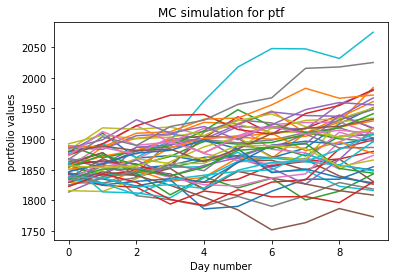

The expected value of the portfolio at time 10 is 1883.8639615834725 and the standard deviation is 44.657596484976224
The lower bound for a confidence interval at 95% is 1871.485507375513and the upper bound is 1896.242415791432


In [5]:
#monte carlo methods, assuming a multivariate gaussian distribution
#define the number of simulation
mc_number = int(input("Enter the number of simulation:"))
#define a time range
T = int(input("Define the time range:"))
#at what time range should the final statistics be computed?
time_horizon = int(input("At what time range should the final statistics be computed:"))




#creating the storage variables
meanmatrix = np.full(shape=(T,len(weights)),fill_value =meanreturns)
meanmatrix = meanmatrix.T
#0.0 so that floats can be added
portfolio_sim = np.full(shape=(T,mc_number),fill_value = 0.0)

initial_ptf = np.inner(weights,price[1,:].T)
initial_ptf
for m in range(0,mc_number):
    z=np.random.normal(size =(T,len(weights)))
    l=np.linalg.cholesky(varcov)
    daily_ret = meanmatrix+np.inner(l,z)
    portfolio_sim[:,m]=np.cumprod(np.inner(weights,daily_ret.T)+1)*initial_ptf
plt.plot(portfolio_sim)
plt.ylabel('portfolio values')
plt.xlabel('Day number')
plt.title('MC simulation for ptf')
plt.show()
#portfolio value and portfolio standard deviation at a certain time, change manually the number T-1 if you want 
#the statistics at another point of the iteration
final_value_mean=portfolio_sim[time_horizon,:].mean()
final_value_std= portfolio_sim[time_horizon,:].std()
print("The expected value of the portfolio at time " + str(T) + " is " + str(final_value_mean) +" and the standard deviation is " +str(final_value_std))
#confidence interval al 95%
confidence_interval_down = final_value_mean-1.96*final_value_std/np.sqrt(mc_number)
confidence_interval_up = final_value_mean+1.96*final_value_std/np.sqrt(mc_number)

print("The lower bound for a confidence interval at 95% is " + str(confidence_interval_down) + "and the upper bound is " + 
     str(confidence_interval_up))






     
     
    
    
